## Research question 3
Does the quality of family relationships, parents' cohabitation status have an impact on alcohol consumption?

selected columns::
[['famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'guardian_father', 'guardian_mother', 'guardian_other', 'famsup_no', 'famsup_yes', 'Medu', 'Fedu']]

In [38]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn import set_config
set_config(transform_output = "pandas")

In [68]:
# Import train and test sets
X_train = pd.read_csv('smoteTrainSet.csv')
X_test = pd.read_csv('ScaledTestSet.csv')

In [69]:
# Separate target from dataset
y_train = X_train['alc']
X_train = X_train [['famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'guardian_father', 'guardian_mother', 'guardian_other', 'famsup_no', 'famsup_yes', 'Medu', 'Fedu']] 
y_test = X_test['alc']
X_test = X_test [['famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'guardian_father', 'guardian_mother', 'guardian_other', 'famsup_no', 'famsup_yes', 'Medu', 'Fedu']]


## OneR Classifier

In [70]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy = "most_frequent")



In [71]:
dummy.fit(X_train,y_train)

DummyClassifier(strategy='most_frequent')

In [72]:
from sklearn.metrics import accuracy_score
print('Train Accuracy', accuracy_score(y_train, dummy.predict(X_train)))
print('Test Accuracy', accuracy_score(y_test, dummy.predict(X_test)))

Train Accuracy 0.5
Test Accuracy 0.5502392344497608


## KNN Classifier

In [73]:
from sklearn.neighbors import KNeighborsClassifier
knn =KNeighborsClassifier(n_neighbors = 25)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=25)

In [74]:
# Predicting Alcohol Consumption
y_pred = knn.predict(X_test)

In [75]:
pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})

,y_test,y_pred
0,0.0,0.0
1,0.0,1.0
2,0.0,0.0
3,0.0,0.0
4,0.0,1.0
...,...,...
204,1.0,0.0
205,1.0,1.0
206,0.0,1.0
207,0.0,0.0


In [76]:
# !pip install scikit-plot


In [77]:
import scikitplot as skplt
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print('Test Accuracy ', accuracy_score(y_test, y_pred ))

Test Accuracy  0.6124401913875598


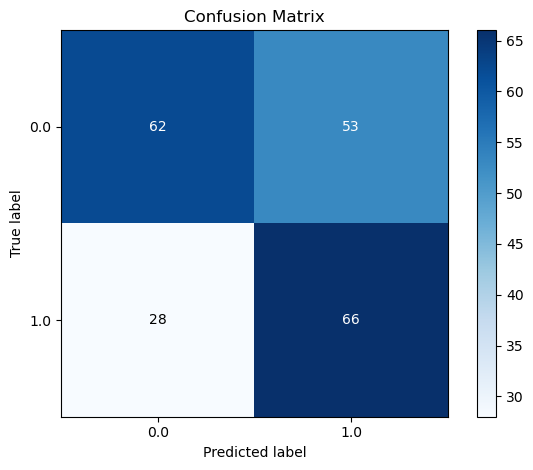

In [78]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred);
save_fig('Confusion Matrix for KNN q3')

In [79]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.69      0.54      0.60       115
         1.0       0.55      0.70      0.62        94

    accuracy                           0.61       209
   macro avg       0.62      0.62      0.61       209
weighted avg       0.63      0.61      0.61       209



## Decision Tree

In [80]:
from matplotlib import pyplot as plt
from sklearn import tree

In [81]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
print('Accuracy ', accuracy_score(y_test, dt.predict(X_test)).round(3))

Accuracy  0.909


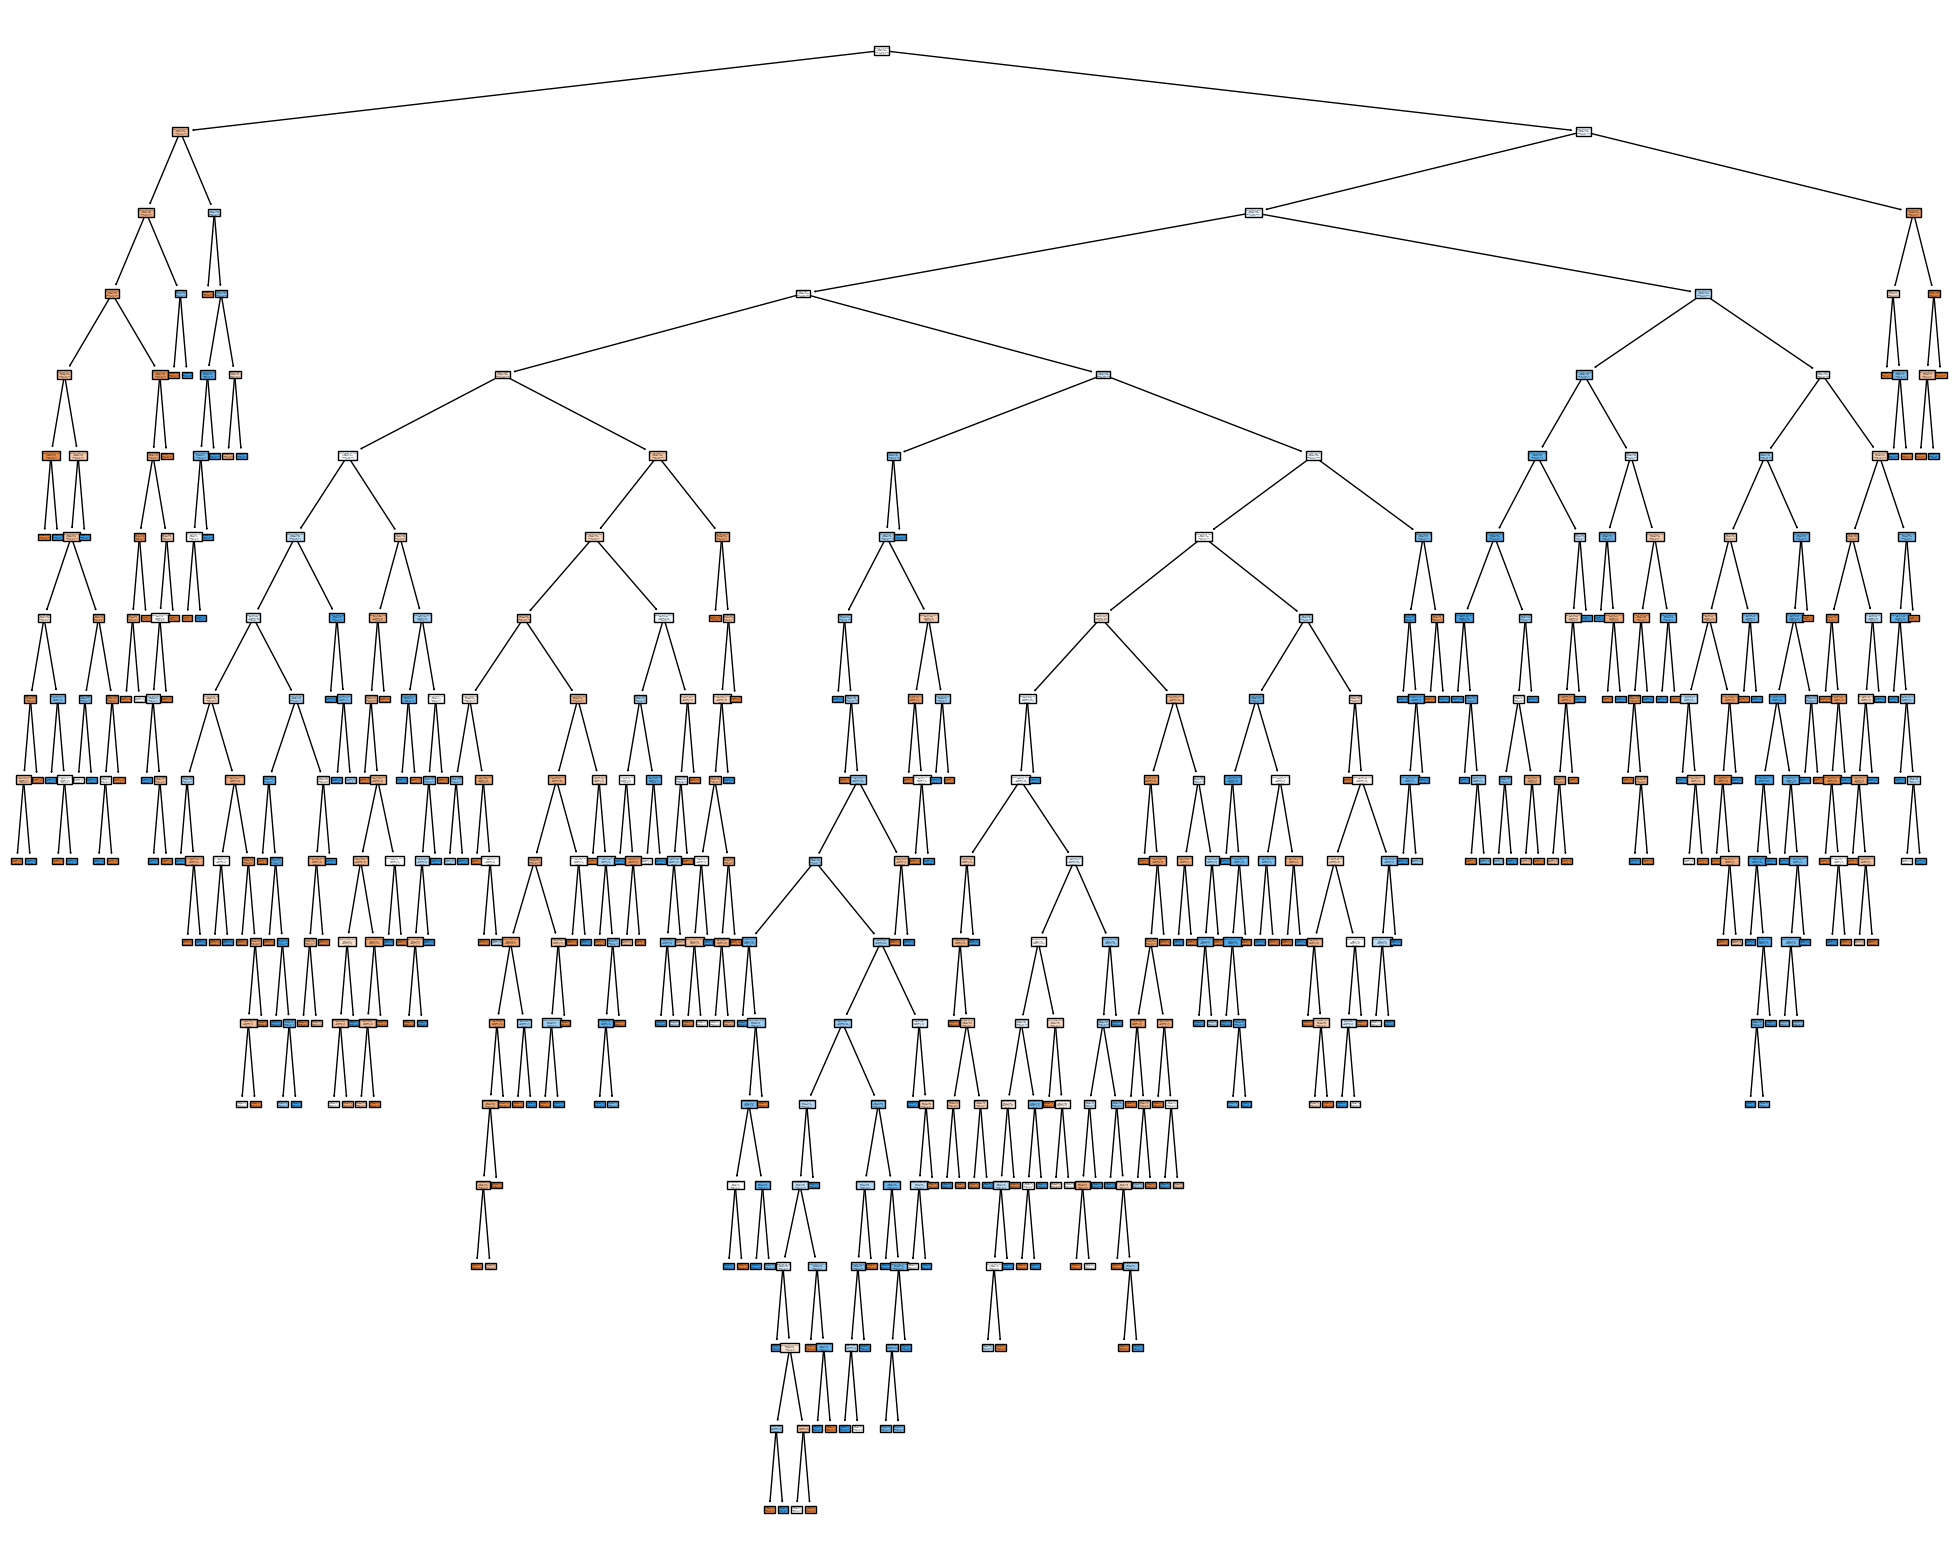

In [82]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt, 
                   feature_names=X_train.columns.values.tolist(),  
                   class_names=y_train.name,
                   filled=True)

In [83]:
fig.savefig("decistion_tree.png")


In [84]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "decision_trees"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

Max Depth =  1 , Train Acc. =  0.538 , Test Acc. =  0.517
Max Depth =  2 , Train Acc. =  0.565 , Test Acc. =  0.545
Max Depth =  3 , Train Acc. =  0.571 , Test Acc. =  0.55
Max Depth =  4 , Train Acc. =  0.621 , Test Acc. =  0.66
Max Depth =  5 , Train Acc. =  0.64 , Test Acc. =  0.636
Max Depth =  6 , Train Acc. =  0.675 , Test Acc. =  0.665
Max Depth =  7 , Train Acc. =  0.72 , Test Acc. =  0.718
Max Depth =  8 , Train Acc. =  0.758 , Test Acc. =  0.78
Max Depth =  9 , Train Acc. =  0.789 , Test Acc. =  0.818
Max Depth =  10 , Train Acc. =  0.831 , Test Acc. =  0.842
Max Depth =  11 , Train Acc. =  0.854 , Test Acc. =  0.837
Max Depth =  12 , Train Acc. =  0.864 , Test Acc. =  0.852
Max Depth =  13 , Train Acc. =  0.874 , Test Acc. =  0.861
Max Depth =  14 , Train Acc. =  0.888 , Test Acc. =  0.876
Max Depth =  15 , Train Acc. =  0.895 , Test Acc. =  0.885
Max Depth =  16 , Train Acc. =  0.9 , Test Acc. =  0.9
Max Depth =  17 , Train Acc. =  0.902 , Test Acc. =  0.904
Max Depth =  18

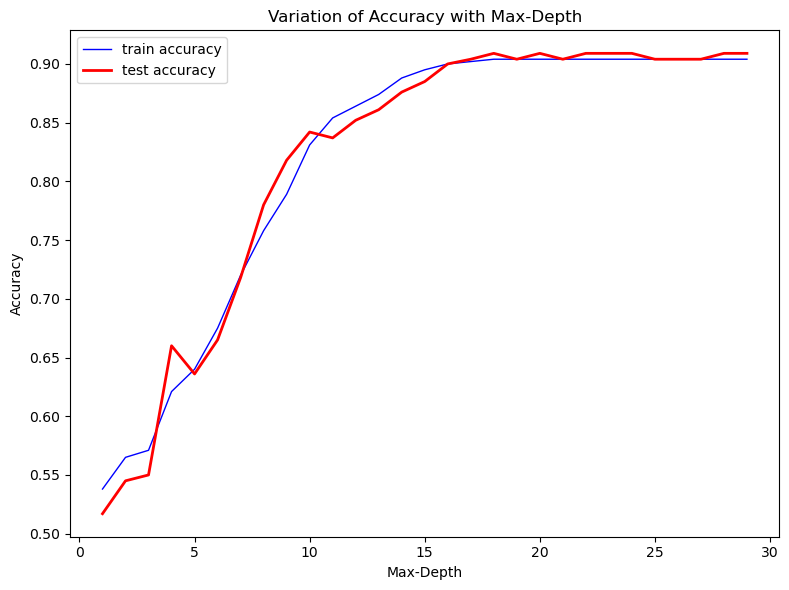

In [85]:
train_acc = []
test_acc = []
max_depth =[]

for depth in range(1, 30):
    clf = DecisionTreeClassifier(max_depth = depth)
    clf.fit(X_train, y_train)
    train_acc.append(accuracy_score(y_train, clf.predict(X_train)).round(3))
    test_acc.append(accuracy_score(y_test, clf.predict(X_test)).round(3))
    max_depth.append(depth)

for i in range(1, 30):
    print('Max Depth = ', i, ', Train Acc. = ', train_acc[i-1], ', Test Acc. = ' ,
         test_acc[i-1])

plt.figure(figsize = (8,6))
plt.xlabel('Max-Depth')
plt.ylabel('Accuracy')
plt.title('Variation of Accuracy with Max-Depth')
plt.plot(max_depth, train_acc, color = 'blue', linewidth = 1,
         label = 'train accuracy');

plt.plot(max_depth, test_acc, color = 'red', linewidth = 2,
         label = 'test accuracy')
plt.legend()
save_fig('Accuracy against max_depth')
plt.show();

In [89]:
from sklearn. metrics import classification_report, accuracy_score, confusion_matrix
# Confu
pd. DataFrame (confusion_matrix(y_test, dt.predict(X_test)))

,0,1
0,104,11
1,8,86


In [87]:
print(classification_report (y_train, dt.predict(X_train).round (3)))

              precision    recall  f1-score   support

         0.0       0.88      0.93      0.91       446
         1.0       0.93      0.87      0.90       446

    accuracy                           0.90       892
   macro avg       0.91      0.90      0.90       892
weighted avg       0.91      0.90      0.90       892



In [88]:
print(classification_report(y_test, dt.predict (X_test). round(3)))

              precision    recall  f1-score   support

         0.0       0.93      0.90      0.92       115
         1.0       0.89      0.91      0.90        94

    accuracy                           0.91       209
   macro avg       0.91      0.91      0.91       209
weighted avg       0.91      0.91      0.91       209

